In [5]:
import pandas as pd
import altair as alt

In [6]:
names = pd.read_csv('dpt2020.csv', sep=';')

In [7]:
names

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727548,2,ZYA,2018,59,3
3727549,2,ZYA,XXXX,XX,264
3727550,2,ZYNA,2013,93,3
3727551,2,ZYNA,XXXX,XX,59


In [8]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727553 entries, 0 to 3727552
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   sexe      int64 
 1   preusuel  object
 2   annais    object
 3   dpt       object
 4   nombre    int64 
dtypes: int64(2), object(3)
memory usage: 142.2+ MB


In [9]:
names.describe()

,sexe,nombre
count,3.727553e+06,3.727553e+06
mean,1.535894e+00,2.323390e+01
std,4.987100e-01,8.047527e+01
min,1.000000e+00,3.000000e+00
25%,1.000000e+00,4.000000e+00
50%,2.000000e+00,7.000000e+00
75%,2.000000e+00,1.900000e+01
max,2.000000e+00,6.310000e+03


In [10]:
names.dpt.value_counts()

dpt
75    127100
59    103867
69     80879
13     79177
62     67952
       ...  
09     15305
05     14928
04     13286
23     12482
48     11099
Name: count, Length: 100, dtype: int64

In [11]:
names.drop(names[names.preusuel == '_PRENOMS_RARES'].index, inplace=True)
names.drop(names[names.dpt == 'XX'].index, inplace=True)

In [12]:
# Convert 'annais' to int
names['annais'] = names['annais'].astype(int)

## Visualization : 3

Are there gender effects in the data? Does popularity of names given to both sexes evolve consistently? (Note: this data set treats sex as binary; this is a simplification that carries into this assignment but does not generally hold.)

## Sketch

This bar chart makes side-by-side comparison between the most popular male and female names each year.

Bars represent the number of babies given the top male (blue) and female (red) names yearly.

This design makes it easy to see how the popularity of names has changed over time for each gender.

This chart is strong in its simplicity, offering a straightforward look at gender-based trends in naming without overwhelming the viewer with too much data.

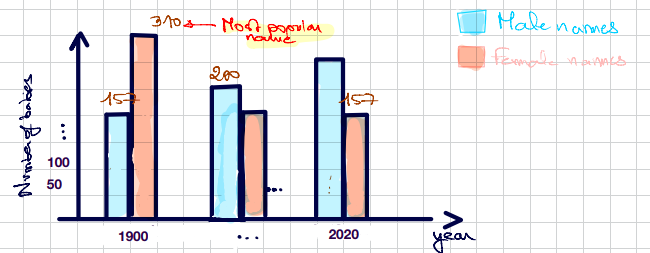

## Implementation

In [13]:
# Group by year, name, and sex, then sum the counts
national_names = names.groupby(['annais', 'preusuel', 'sexe']).nombre.sum().reset_index()

# Separate male and female names
names_males = national_names[national_names.sexe == 1]
names_females = national_names[national_names.sexe == 2]

def most_popular(names):
    # Get the most popular name for each year
    most_popular_names = names.groupby('annais')['nombre'].idxmax()
    return names.loc[most_popular_names]

most_popular_males = most_popular(names_males)
most_popular_females = most_popular(names_females)

# Combine male and female most popular names
most_popular_names = pd.concat([most_popular_females, most_popular_males]).sort_values(['annais', 'sexe'])

In [17]:
# Create the bar chart without faceting
bars = alt.Chart(most_popular_names).mark_bar().encode(
    x=alt.X('annais:O', title='Year', axis=alt.Axis(labelAngle=-90)),
    y=alt.Y('nombre:Q', title='Number of Babies'),
    color=alt.Color('sexe:N', scale=alt.Scale(domain=[1, 2], range=['lightblue', 'lightcoral']),
                    title='Gender'),
    tooltip=['annais','preusuel', 'nombre']
).properties(
    width=1200,
    height=600
)

# # Add text annotations
# text = bars.mark_text(
#     align='center',
#     baseline='bottom',
#     dy=-5  # Adjust the position
# ).encode(
#     text='nombre:Q'
# )

# Combine bar chart and text
final_chart = (bars).properties(
    title='Most Popular Male and Female Names in France Between 1900 and 2020'
)

final_chart

c:\Users\ahmed\anaconda3\envs\visualization\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)